### Connecting to Google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Package imports

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn

import torchvision
from torchvision import datasets, models, transforms

import time
import os
import copy

### Setting the seeds

In [ ]:
torch.manual_seed(0)
torch.backends.cudnn.deterministic= True
torch.backends.cudnn.benchmark= False

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

In [ ]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [ ]:
# provide data directory
data_dir = '/content/drive/MyDrive/data'


# create image folders for our training and validation data
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

# get dataset sizes from image_datasets
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# get class_names from image_datasets
class_names = image_datasets['train'].classes

# use image_datasets to sample from the dataset
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True)
              for x in ['train', 'val']}

In [ ]:
# Change selected device to CUDA, if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [ ]:
def imshow(inp, title=None):

    # use trasnpose to get the images into the correct shape
    inp = inp.numpy().transpose((1, 2, 0))

    # use default values for mean and std
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])


    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)

    # visualize inp
    plt.imshow(inp)

    if title is not None:
        plt.title(title)
    plt.pause(0.001)


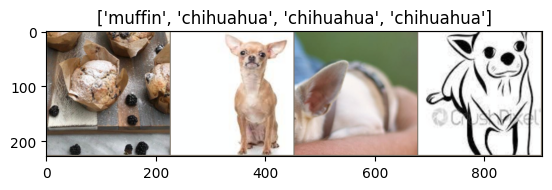

In [ ]:
# get a batch of training data
inputs, classes = next(iter(dataloaders['train']))

# make a grid from batch
out = torchvision.utils.make_grid(inputs)

# plot the grid with a title that concatenates all the class labels
imshow(out, title=[class_names[x] for x in classes])

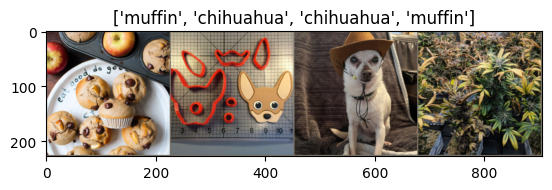

In [ ]:
# get a batch of testing data
inputs, classes = next(iter(dataloaders['val']))

# make a grid from batch
out = torchvision.utils.make_grid(inputs)

# plot the grid with a title that concatenates all the class labels
imshow(out, title=[class_names[x] for x in classes])